In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams #rc paramaters are graph parameters
rcParams['figure.figsize'] = 15, 6 #size of matplot graph

In [2]:
data = pd.read_csv('AirPassengers.csv')
print(data.head())
print('\n Data Types:')
print(data.dtypes)

     Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121

 Data Types:
Month          object
#Passengers     int64
dtype: object


# Reading as datetime format:

Month is not in Time format so we have to convert it.

In [3]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m') #strptime is string parser. this conerts string to date formate
data = pd.read_csv('AirPassengers.csv', parse_dates=['Month'], index_col='Month',date_parser=dateparse)
data.head()

/Users/apple/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [4]:
#convert to time series
ts = data['#Passengers']
ts.head()

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

# Checking for stationary..Plot the time series

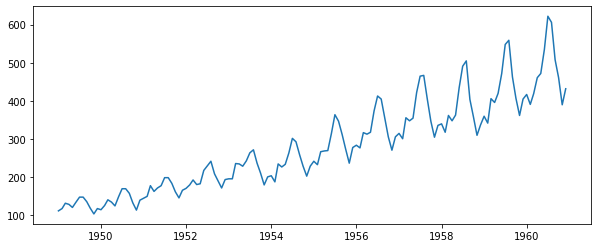

In [5]:
plt.figure(figsize=(10,4))
plt.plot(ts)

# Function for testing stationary

In [6]:
from statsmodels.tsa.stattools import adfuller #adfuller is a statistical maethod, tsa is time series analysis. 
def test_stationary(timeseries):
    
    #determining rolling statistics. in short we are finding moving avg.
    rolmean = timeseries.rolling(window=12).mean() #rolling mean
    rolstd = timeseries.rolling(window=12).std() #rolling standard div
    
    #plot rolling statistics:
    plt.figure(figsize=(12,5))
    orig = plt.plot(timeseries, color='blue',label='Original') #origin
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best') #all is displayed in graph
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    #performing Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC') #autolag AIC is log method
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observatons Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)    
    

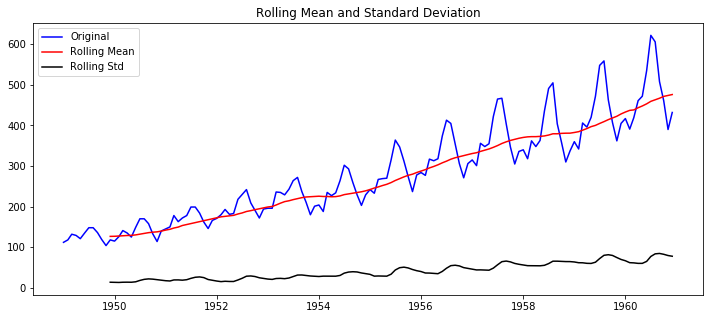

Results of Dickey-Fuller Test:
Test Statistic                  0.815369
p-value                         0.991880
#Lags Used                     13.000000
Number of Observatons Used    130.000000
Critical Value (1%)            -3.481682
Critical Value (5%)            -2.884042
Critical Value (10%)           -2.578770
dtype: float64


In [7]:
test_stationary(ts)

# Making TS stationary 

# Estimating and Eliminating Trend

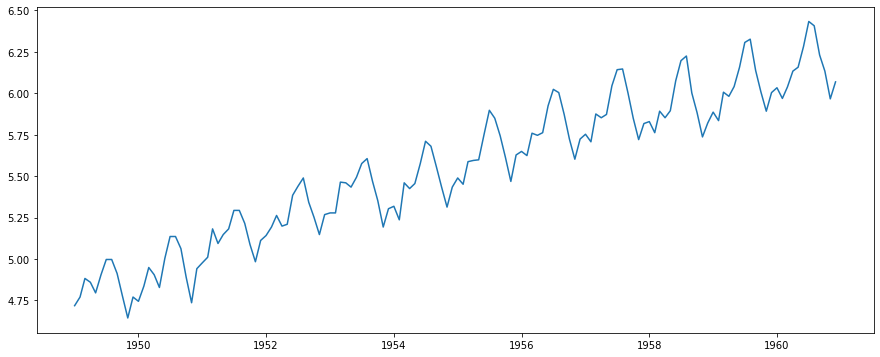

In [8]:
ts_log = np.log(ts) #log is to expose hidden patterns
plt.plot(ts_log)

In [9]:
print(ts_log,ts)

Month
1949-01-01    4.718499
1949-02-01    4.770685
1949-03-01    4.882802
1949-04-01    4.859812
1949-05-01    4.795791
                ...   
1960-08-01    6.406880
1960-09-01    6.230481
1960-10-01    6.133398
1960-11-01    5.966147
1960-12-01    6.068426
Name: #Passengers, Length: 144, dtype: float64 Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, Length: 144, dtype: int64


# Smoothing

# Moving average

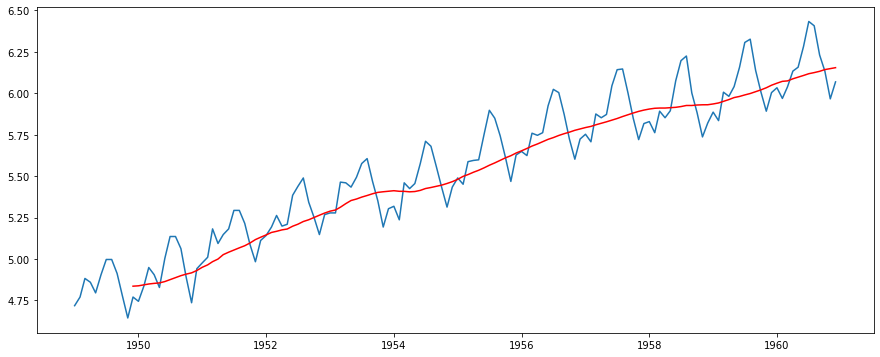

In [10]:
moving_avg = ts_log.rolling(window=12).mean() #to check if mean is constant
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [11]:
ts_log_moving_avg_diff = ts_log - moving_avg #difference. between moving avg of log values
ts_log_moving_avg_diff.head(12)

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01   -0.065494
Name: #Passengers, dtype: float64

In [12]:
ts_log_moving_avg_diff.dropna(inplace=True) #dropping Nan values
ts_log_moving_avg_diff.head()

Month
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
1950-04-01    0.052142
Name: #Passengers, dtype: float64

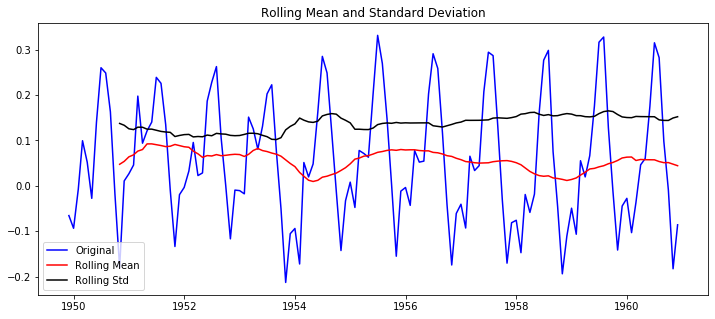

Results of Dickey-Fuller Test:
Test Statistic                 -3.162908
p-value                         0.022235
#Lags Used                     13.000000
Number of Observatons Used    119.000000
Critical Value (1%)            -3.486535
Critical Value (5%)            -2.886151
Critical Value (10%)           -2.579896
dtype: float64


In [13]:
test_stationary(ts_log_moving_avg_diff)

# Exponentially weighted moving avg

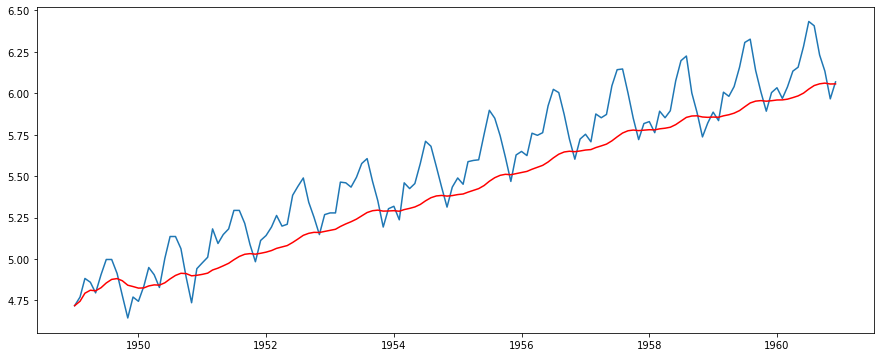

In [14]:
expwighted_avg = ts_log.ewm(halflife=12).mean() #ewm (exponentially weighted moving avg) halflife =12 is window size will be 6months
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')


In [15]:
expwighted_avg,ts_log

(Month
 1949-01-01    4.718499
 1949-02-01    4.745345
 1949-03-01    4.793835
 1949-04-01    4.811785
 1949-05-01    4.808206
                 ...   
 1960-08-01    6.046445
 1960-09-01    6.056778
 1960-10-01    6.061079
 1960-11-01    6.055750
 1960-12-01    6.056461
 Name: #Passengers, Length: 144, dtype: float64,
 Month
 1949-01-01    4.718499
 1949-02-01    4.770685
 1949-03-01    4.882802
 1949-04-01    4.859812
 1949-05-01    4.795791
                 ...   
 1960-08-01    6.406880
 1960-09-01    6.230481
 1960-10-01    6.133398
 1960-11-01    5.966147
 1960-12-01    6.068426
 Name: #Passengers, Length: 144, dtype: float64)

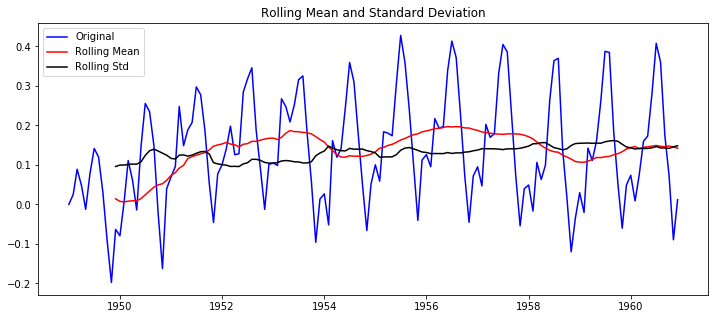

Results of Dickey-Fuller Test:
Test Statistic                 -3.601262
p-value                         0.005737
#Lags Used                     13.000000
Number of Observatons Used    130.000000
Critical Value (1%)            -3.481682
Critical Value (5%)            -2.884042
Critical Value (10%)           -2.578770
dtype: float64


In [16]:
ts_log_ewma_diff = ts_log - expwighted_avg #log value with exponential values
test_stationary(ts_log_ewma_diff)

# Eliminating Trend and Seasonality

# Differencing

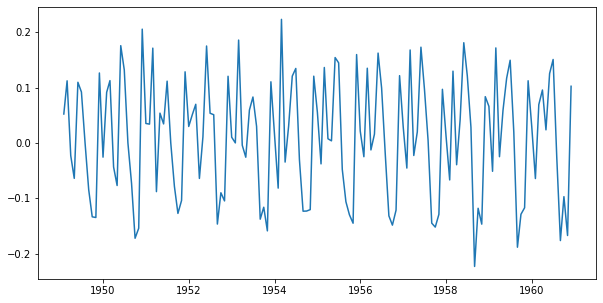

In [17]:
#taking first difference
plt.figure(figsize=(10,5))
ts_log_diff = ts_log - ts_log.shift() #shift is all value will be shifted to next one
plt.plot(ts_log_diff)

In [18]:
ts_log.shift()

Month
1949-01-01         NaN
1949-02-01    4.718499
1949-03-01    4.770685
1949-04-01    4.882802
1949-05-01    4.859812
                ...   
1960-08-01    6.432940
1960-09-01    6.406880
1960-10-01    6.230481
1960-11-01    6.133398
1960-12-01    5.966147
Name: #Passengers, Length: 144, dtype: float64

<Figure size 864x432 with 0 Axes>

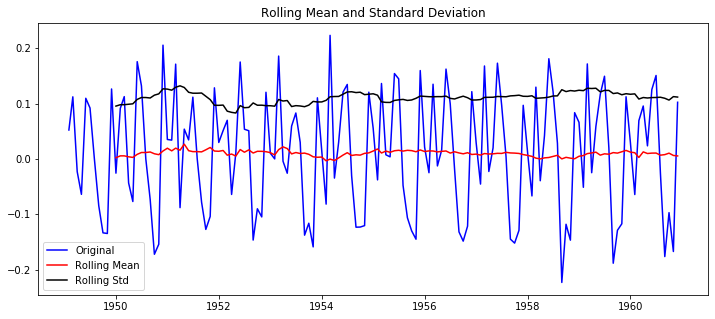

Results of Dickey-Fuller Test:
Test Statistic                 -2.717131
p-value                         0.071121
#Lags Used                     14.000000
Number of Observatons Used    128.000000
Critical Value (1%)            -3.482501
Critical Value (5%)            -2.884398
Critical Value (10%)           -2.578960
dtype: float64


In [19]:
plt.figure(figsize=(12,6))
ts_log_diff.dropna(inplace=True)
test_stationary(ts_log_diff) #checking if the data is stationary or no

# Decomposition 


Dividing the data in trend and all

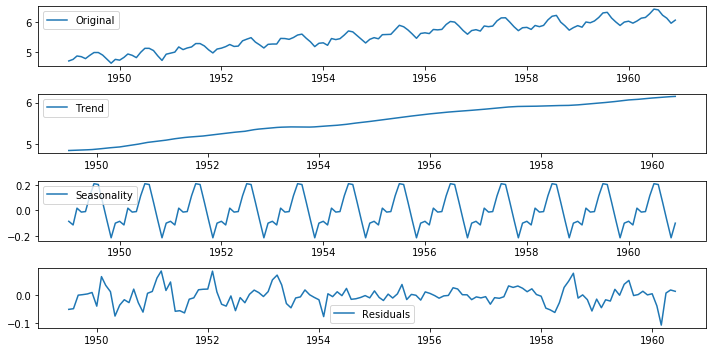

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
resid = decomposition.resid

plt.figure(figsize=(10,5))
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(resid,label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

<Figure size 864x360 with 0 Axes>

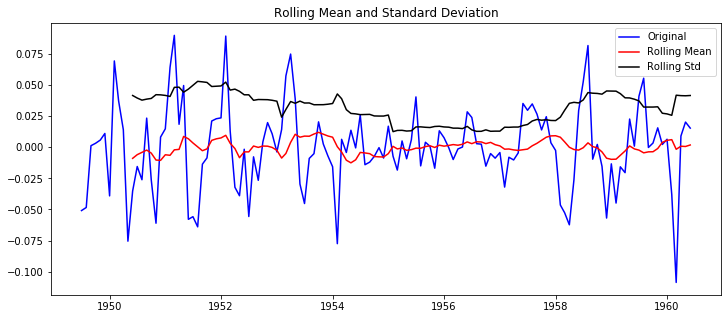

Results of Dickey-Fuller Test:
Test Statistic               -6.332387e+00
p-value                       2.885059e-08
#Lags Used                    9.000000e+00
Number of Observatons Used    1.220000e+02
Critical Value (1%)          -3.485122e+00
Critical Value (5%)          -2.885538e+00
Critical Value (10%)         -2.579569e+00
dtype: float64


In [30]:
#checking residual data if it is stationary or not
plt.figure(figsize=(12,5))
ts_log_decompose = resid
ts_log_decompose.dropna(inplace=True)
test_stationary(ts_log_decompose)

# Final Forecasting

ARIMA (auto regressive(AR) integrated(I) moving average(MA))

In [34]:
from statsmodels.tsa.arima_model import ARIMA #arima is one of the method to implement Time Series Model

# ACF and PACF Plots

ACF (auto correlation factor) and PACF (partial auto correlation factor) this are used to decide what is ARIMA
If ACF is good so we can use only AR model.
If it is PACF so we can use omly moving avg.

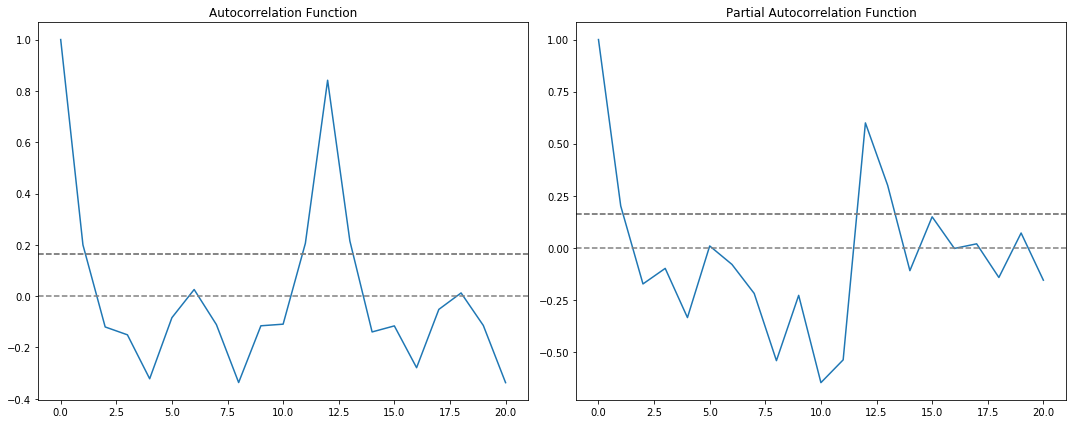

In [36]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(ts_log_diff, nlags=20) #taking ts log diff and nlag is number of log values
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

#plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
plt.tight_layout()

#plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

# AR MODEL:

/Users/apple/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/apple/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 1.5023')

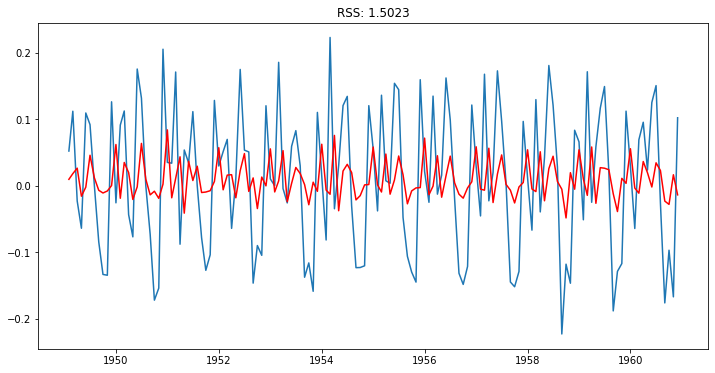

In [41]:
#AR model:
model = ARIMA(ts_log, order=(2, 1, 0)) #2 is auto regressive 1 is integrated and 0 is moving avg mean not perfoming moving avg
results_AR = model.fit(disp=-1)
plt.figure(figsize=(12,6))
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

# MA model

/Users/apple/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/apple/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 1.4721')

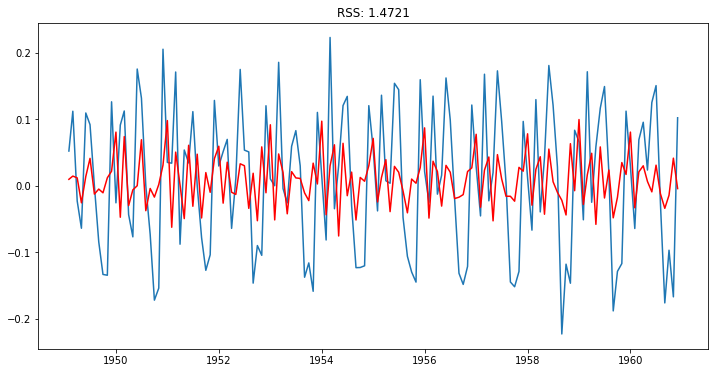

In [47]:
#MA model:
model = ARIMA(ts_log, order=(0, 1, 2)) 
results_MA = model.fit(disp=-1)
plt.figure(figsize=(12,6))
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

# ARIMA

/Users/apple/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/apple/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 1.0292')

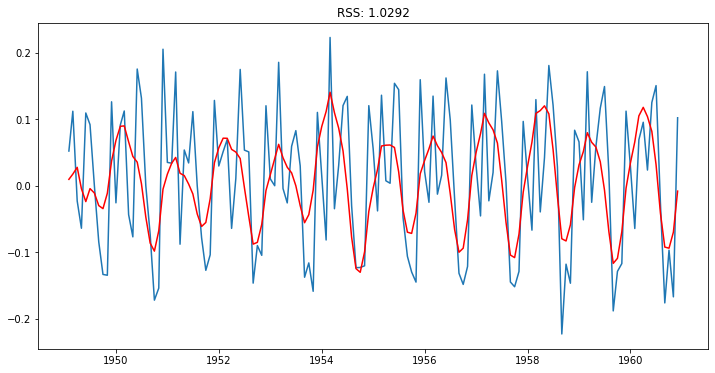

In [48]:
#ARIMA model:
model = ARIMA(ts_log, order=(2, 1, 2)) 
results_ARIMA = model.fit(disp=-1)
plt.figure(figsize=(12,6))
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

ARIMA model has the residual so it is the best model

# Convert to original scale:

In [55]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True) 
print(predictions_ARIMA_diff.head())

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64


In [56]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum() 
print(predictions_ARIMA_diff_cumsum.head())

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64


In [57]:
predictions_ARIMA_log = pd.Series(ts_log.iloc[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

In [58]:
predictions_ARIMA_log.head(10)

Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
1949-06-01    4.744830
1949-07-01    4.740483
1949-08-01    4.729506
1949-09-01    4.699577
1949-10-01    4.665110
dtype: float64

In [59]:
ts_log.head(10)

Month
1949-01-01    4.718499
1949-02-01    4.770685
1949-03-01    4.882802
1949-04-01    4.859812
1949-05-01    4.795791
1949-06-01    4.905275
1949-07-01    4.997212
1949-08-01    4.997212
1949-09-01    4.912655
1949-10-01    4.779123
Name: #Passengers, dtype: float64

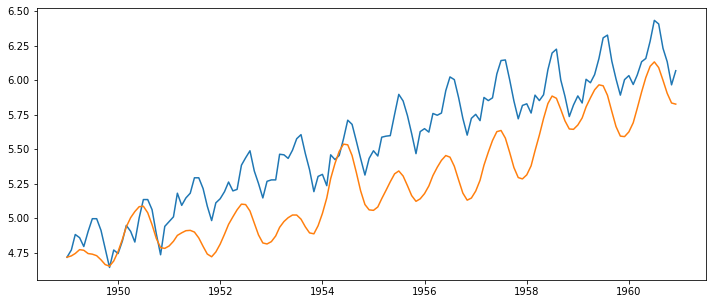

In [60]:
plt.figure(figsize=(12,5))
plt.plot(ts_log)
plt.plot(predictions_ARIMA_log)

Text(0.5, 1.0, 'RMSE: 90.1045')

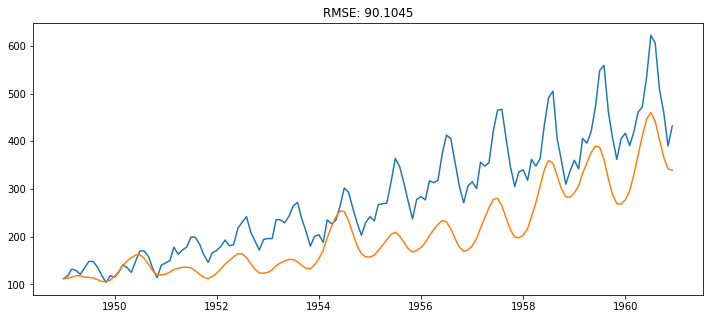

In [62]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)

plt.figure(figsize=(12,5))
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))

In [63]:
predictions_ARIMA

Month
1949-01-01    112.000000
1949-02-01    113.078122
1949-03-01    115.073416
1949-04-01    118.301993
1949-05-01    117.768370
                 ...    
1960-08-01    441.885998
1960-09-01    402.905509
1960-10-01    366.753121
1960-11-01    341.984433
1960-12-01    339.216420
Length: 144, dtype: float64

In [64]:
data

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


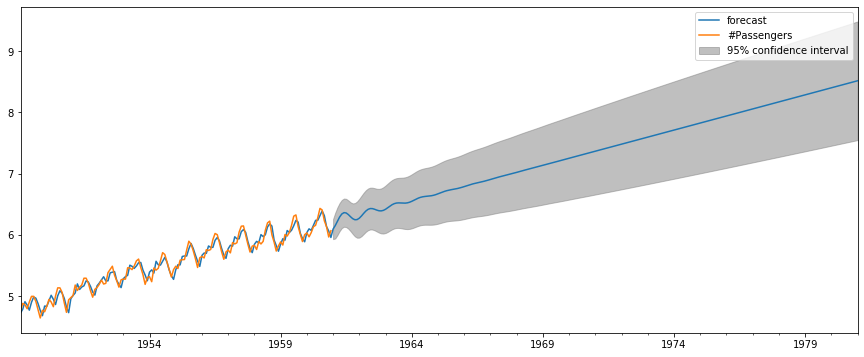

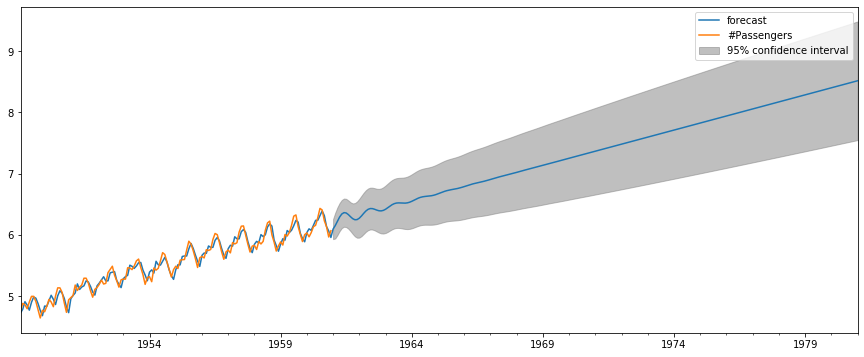

In [68]:
results_ARIMA.plot_predict(1,384) #1,384 how many months and years

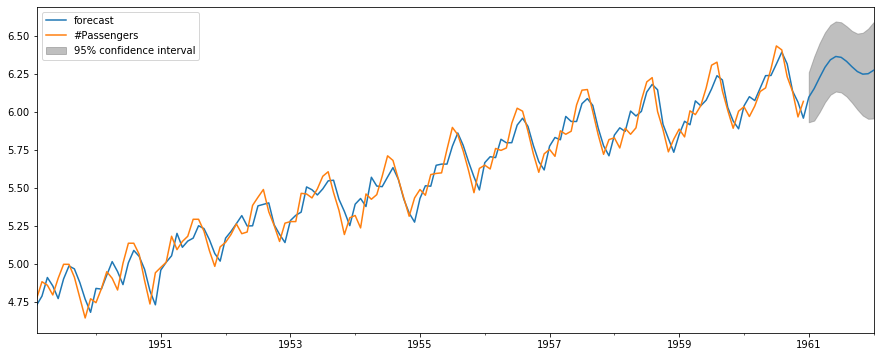

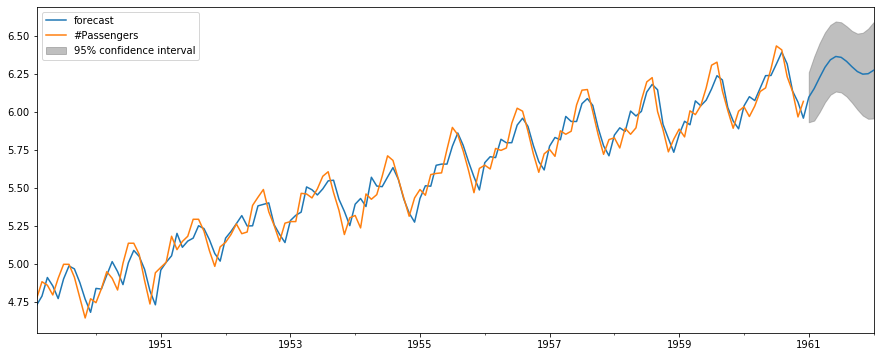

In [66]:
results_ARIMA.plot_predict(1,156)

In [67]:
x=results_ARIMA.forecast(steps=156)
x

(array([6.09553393, 6.15281405, 6.2244297 , 6.29241107, 6.34164723,
        6.36359368, 6.3578469 , 6.33139306, 6.29597539, 6.26447711,
        6.24738322, 6.25025168, 6.27275834, 6.30940313, 6.35151496,
        6.3898866 , 6.41727386, 6.43011058, 6.4290669 , 6.41842487,
        6.4045615 , 6.39403609, 6.39183076, 6.40019498, 6.41833689,
        6.44295407, 6.46937437, 6.49293988, 6.51024121, 6.51989034,
        6.52267577, 6.52112383, 6.5186452 , 6.51853682, 6.52311915,
        6.53322354, 6.54812865, 6.56591555, 6.58410308, 6.60036539,
        6.61313265, 6.62192778, 6.62737784, 6.63093122, 6.63438681,
        6.63937976, 6.64696497, 6.65739834, 6.67015319, 6.68414247,
        6.69806623, 6.71077898, 6.72157728, 6.73033978, 6.73749804,
        6.7438637 , 6.75037314, 6.75782583, 6.76668673, 6.77699815,
        6.78841312, 6.80032847, 6.81207188, 6.82308753, 6.83307129,
        6.84202484, 6.85022303, 6.85811211, 6.8661733 , 6.87479141,
        6.88416293, 6.89426374, 6.9048788 , 6.91